# Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()

In [7]:
df['company'] = le.fit_transform(df['company'])
df['job'] = le.fit_transform(df['job'])
df['degree'] = le.fit_transform(df['degree'])

In [8]:
df

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [9]:
X = df.iloc[:,:3]
X

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [11]:
y = df.iloc[:,-1]
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [13]:
len(X_train)

12

In [14]:
len(X_test)

4

In [15]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
dt_model = DecisionTreeClassifier()

In [17]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [18]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
logistic_y_pred = logistic_model.predict(X_test)
logistic_y_pred

array([1, 1, 1, 0], dtype=int64)

In [20]:
dt_y_pred = dt_model.predict(X_test)
dt_y_pred

array([0, 1, 0, 1], dtype=int64)

In [21]:
logistic_model.score(X_test,y_test)

0.5

In [22]:
dt_model.score(X_test,y_test)

0.75

In [25]:
logistic_cr = classification_report(y_test,logistic_y_pred)
print(logistic_cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



In [26]:
dt_cr = classification_report(y_test,dt_y_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



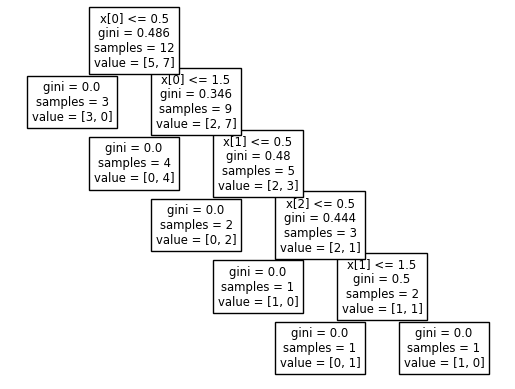

In [32]:
plot_tree(dt_model)
plt.show()

In [41]:
# Wine data
# digits data
# iris data
# titanic data
from sklearn.datasets import load_breast_cancer

In [42]:
bc = load_breast_cancer()

In [43]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(bc.data,bc.target,test_size=0.2,random_state=32)

In [45]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
dt_model.score(X_test,y_test)

0.8947368421052632

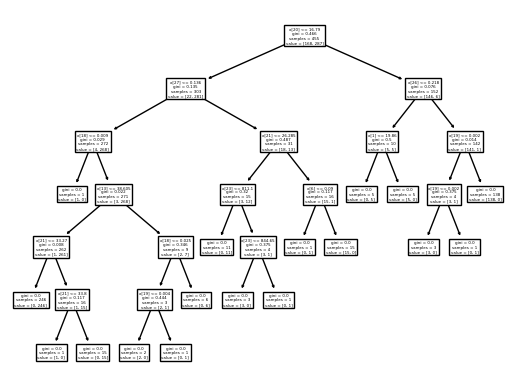

In [47]:
plot_tree(dt_model)
plt.show()

In [54]:
# print(bc.DESCR)

In [52]:
from sklearn.datasets import load_diabetes

diab = load_diabetes()

diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(diab.data,diab.target,test_size=0.2,random_state=32)

In [62]:
from sklearn.tree import DecisionTreeRegressor

dt_reg_model = DecisionTreeRegressor()

dt_reg_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [63]:
dt_reg_model.score(X_test,y_test)

-0.28152850125251616

In [64]:
# diab.target

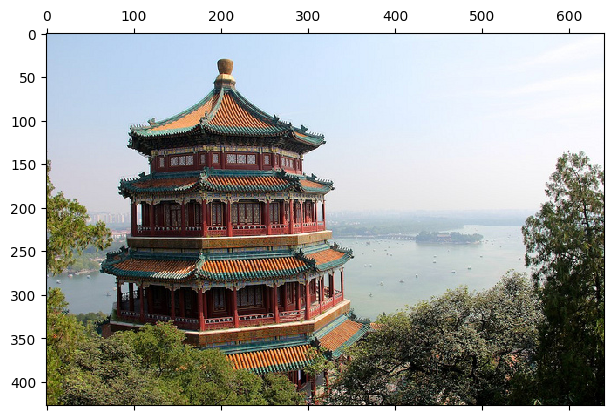

In [69]:
from sklearn.datasets import load_sample_image

diab = load_sample_image(r"china.jpg")

plt.matshow(diab)

In [72]:
from sklearn.datasets import load_sample_images

In [75]:
load_sample_images().keys()

dict_keys(['images', 'filenames', 'DESCR'])

In [76]:
load_sample_images()['filenames']

['china.jpg', 'flower.jpg']

In [78]:
titanic = pd.read_csv(r"C:\Users\Lenovo\Downloads\titanic.csv")
titanic.drop(['Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [79]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [84]:
titanic['Sex'] = pd.get_dummies(titanic['Sex'],drop_first=True)

In [85]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,NaN,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [93]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [94]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [95]:
X = titanic.drop('Survived',axis=1)
y = titanic.Survived

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=28650)

In [115]:
dt_model = DecisionTreeClassifier()

In [116]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [117]:
dt_model.score(X_test,y_test)

0.7653631284916201

In [124]:
i = 0
max_score = 0
random_s = 0
while True:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train,y_train)
    score = dt_model.score(X_test,y_test)
    if score>max_score:
        max_score = score
        random_s = i
        
    if score >=85:
        print(f'Best Random {i}')
        break
    else:
        print(f'Iteration no: {i},Score: {max_score}  Random State: {random_s}')
        display(clear=True)
    i+=1
#     del X_train, X_test, y_train, y_test

KeyboardInterrupt: 

In [133]:
# RS: 5391

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5391)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
score = dt_model.score(X_test,y_test)
score

0.8715083798882681

In [134]:
y_pred = dt_model.predict(X_test)

In [135]:
from sklearn.metrics import confusion_matrix

In [136]:
confusion_matrix(y_test,y_pred)

array([[98, 14],
       [ 9, 58]], dtype=int64)

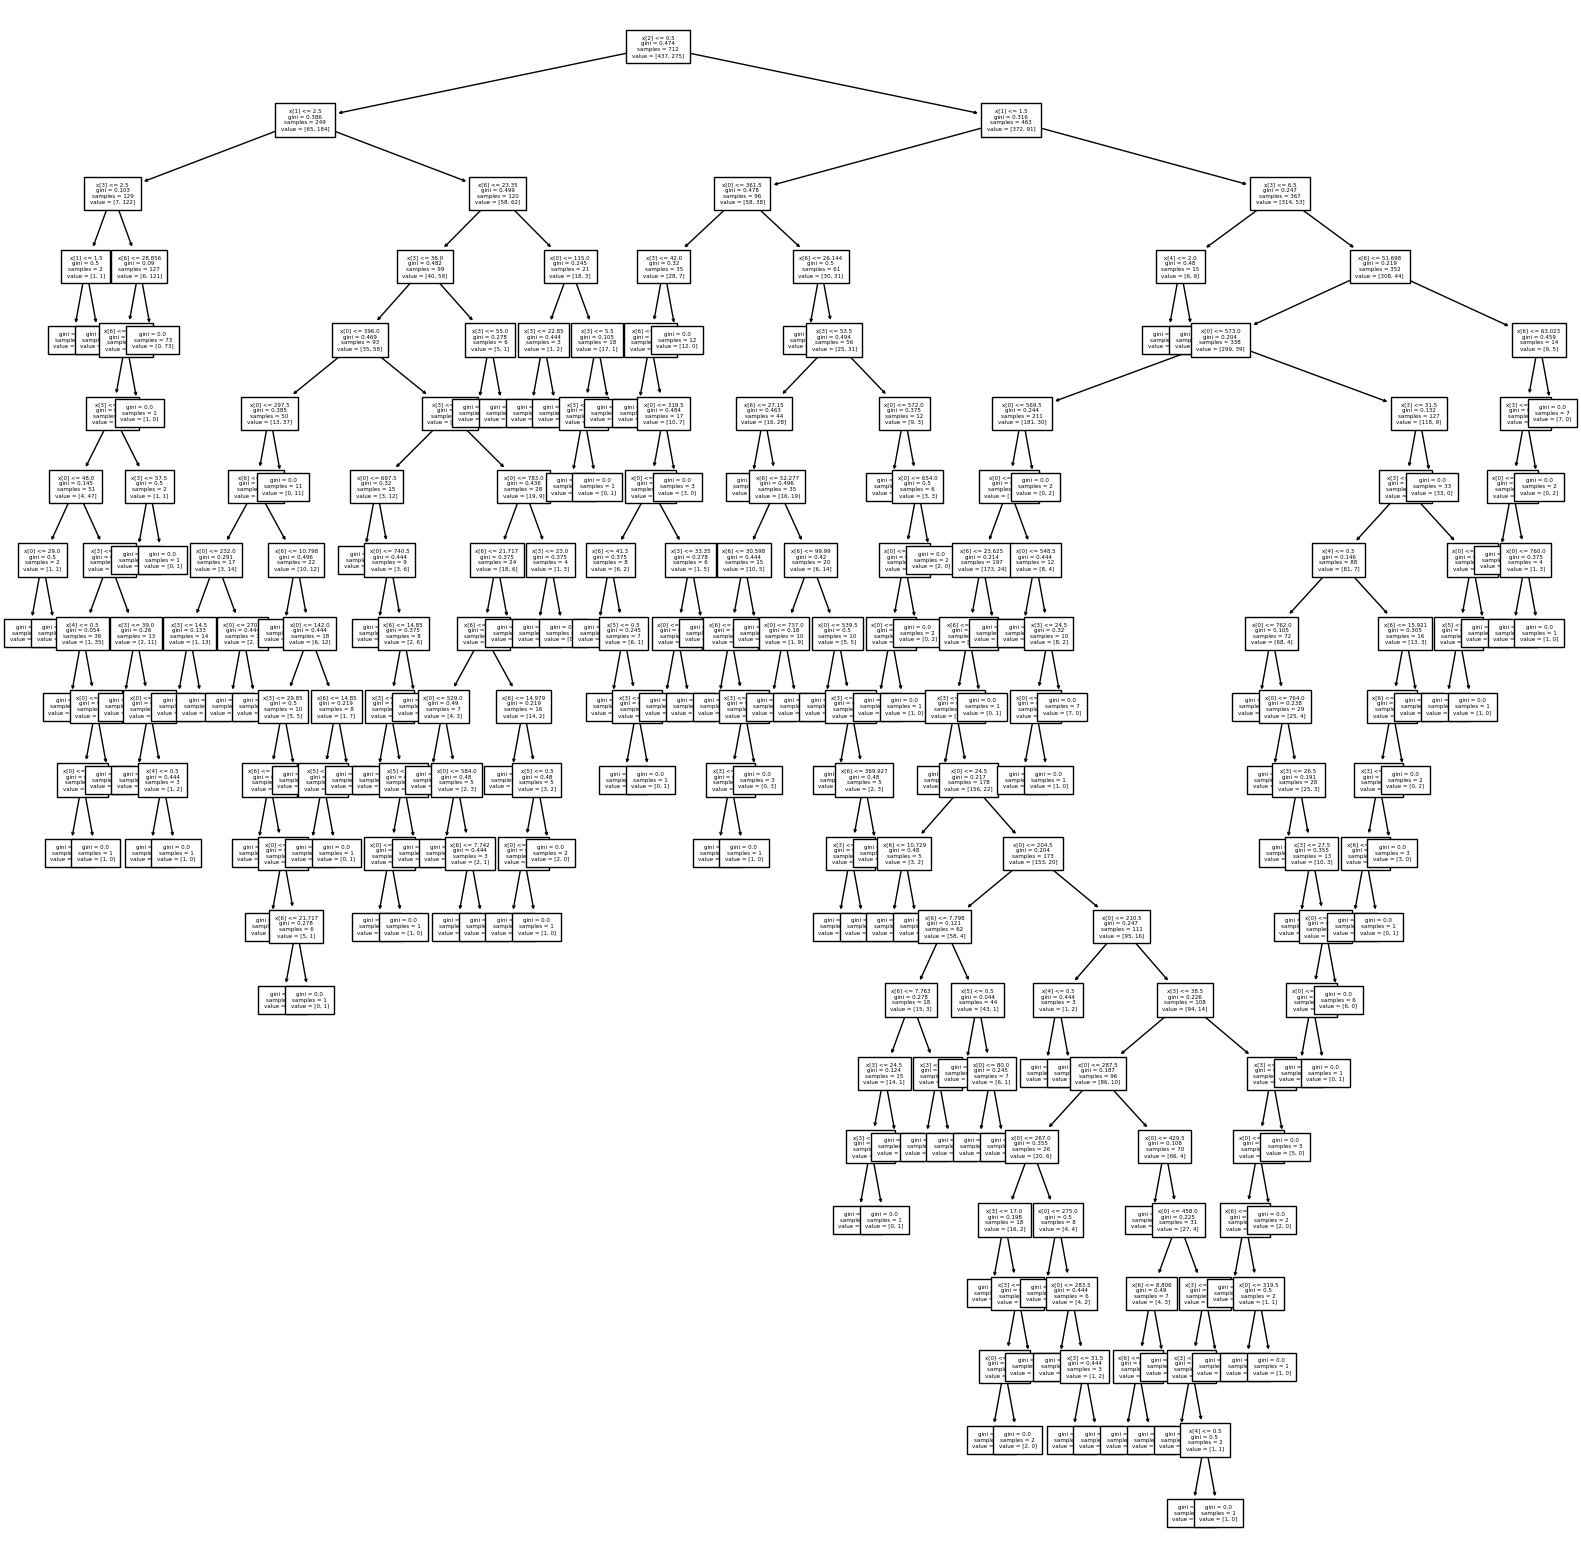

In [144]:
plt.figure(figsize=(20,20))
# plt.style.use('default')
plot_tree(dt_model,fontsize=4)
plt.show()

In [146]:
dt_model

DecisionTreeClassifier()

In [155]:
import graphviz 
dot_data = tree.export_graphviz(dt_model, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train.astype('str'),  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [150]:
# pip install graphviz

In [152]:
import os
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'